In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('/content/drive/MyDrive/Stock/SamSung.csv')
df

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index


         Date     Open     High      Low    Close     Adj Close    Volume
0  2018-12-12  40250.0  40700.0  40150.0  40450.0  35281.417969  12024279
1  2018-12-13  40650.0  40750.0  40000.0  40000.0  34888.921875  26254646
2  2018-12-14  40200.0  40200.0  38700.0  38950.0  33973.089844  19671783
3  2018-12-17  38650.0  39600.0  38650.0  39150.0  34147.535156  11532968
4  2018-12-18  38300.0  39200.0  38300.0  38900.0  33929.472656  11042101


In [38]:
# 2.  chia train test validate theo tỉ lệ 7:3
# Split the data into training, testing
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))


X2D = df[['High']] # Biến độc lập theo mảng 2 chiều
Y2D = df[['Close']] # Biến phụ thuộc theo mảng 2 chiều



In [39]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình SVR với kernel RBF
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Ví dụ các giá trị cho C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Ví dụ các giá trị cho gamma
    'epsilon': [0.001, 0.01, 0.1, 1, 10]      # Ví dụ các giá trị cho epsilon
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
svr_rbf = grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'C': 1000, 'epsilon': 1, 'gamma': 'scale'}
Best score: 7576457.354269952


In [40]:
# dự đoán test

y_pred = svr_rbf.predict(x_test)
y_pred


array([61226.93104992, 59310.10949035, 59310.10949035, 58614.14347381,
       58515.23436529, 57435.72875407, 58515.23436529, 59310.10949035,
       58911.64883764, 58219.28811837, 57046.85468699, 56949.91500622,
       56853.08106152, 57630.87005417, 56756.34961681, 58120.89909307,
       58713.18256854, 59011.07457541, 58120.89909307, 58022.63909611,
       57630.87005417, 59410.03572224, 61430.48504827, 60922.08833668,
       61532.34692988, 61328.6783115 , 61634.25956367, 61328.6783115 ,
       61328.6783115 , 61328.6783115 , 62042.32798477, 62042.32798477,
       61125.24752443, 61328.6783115 , 61023.63191959, 61226.93104992,
       61328.6783115 , 60820.62078694, 60112.79187058, 58614.14347381,
       59410.03572224, 60112.79187058, 61023.63191959, 60617.92934171,
       61328.6783115 , 61023.63191959, 59810.93220117, 59011.07457541,
       58911.64883764, 59110.627431  , 60314.55679387, 58317.80677551,
       58416.45546102, 59310.10949035, 58317.80677551, 58022.63909611,
      

In [41]:
last_row = df.tail(1)
last_data = last_row['Close'].values.reshape(-1,1)
last_data

array([[73500.]])

In [42]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

[array([72901.00022186]),
 array([72303.07112882]),
 array([71710.78744739]),
 array([71127.77003574]),
 array([70556.49272173]),
 array([69998.25676465]),
 array([69453.29392015]),
 array([68920.94397135]),
 array([68399.85715004]),
 array([67888.18684348]),
 array([67383.75453901]),
 array([66884.18207947]),
 array([66386.99463162]),
 array([65889.70203081]),
 array([65389.86770482]),
 array([64885.17435757]),
 array([64373.49469117]),
 array([63852.97386396]),
 array([63322.12793872]),
 array([62779.95884929]),
 array([62226.08097399]),
 array([61660.84716569]),
 array([61085.45381601]),
 array([60501.99733915]),
 array([59913.45189907]),
 array([59323.54434645]),
 array([58736.51953979]),
 array([58156.81531983]),
 array([57588.69337025]),
 array([57035.88867675])]

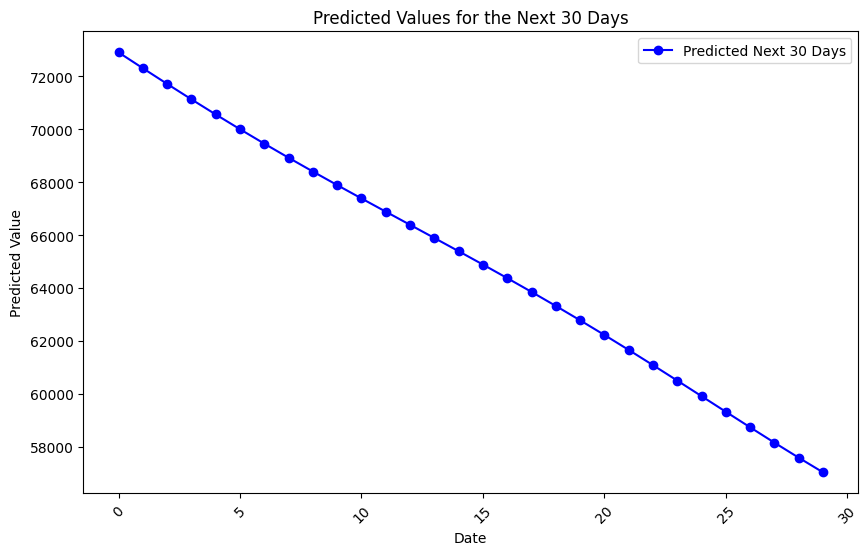

In [43]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [44]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1,1)

In [45]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: Close    444.424113
dtype: float64
Testing MAPE: 0.005439639611916612
Testing MAE: 348.09948048732815


In [46]:
# Tạo index cho 30 ngày tiếp theo
last_index =  df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

Testing RMSE: Close    444.424113
dtype: float64
Testing MAPE: 0.005439639611916612
Testing MAE: 348.09948048732815


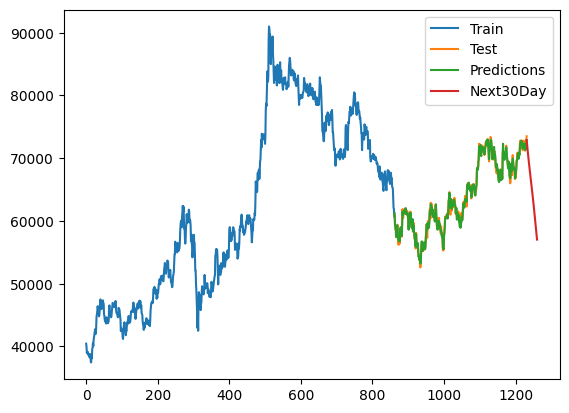

In [47]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình

plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()